In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import warnings
from plotly import __version__
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

warnings.filterwarnings('ignore')

the creation date (time old ?)

analyss 
propertys 

In [527]:
df = pd.read_csv('../data/aqar.csv')

In [528]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'DayOfRent', 'timeBeforeRent', 'onMarket'],
      dtype='object')

In [529]:
try:
    df.drop(['Unnamed: 0.1' , 'Unnamed: 0'] ,axis=1 , inplace=True)
except:
    i=1

this is tell us that un each day how many apartment are rented 

In [530]:
df.DayOfRent.value_counts()

0     4434
2      394
4      350
1      282
5      261
8      245
10     212
3      184
9      168
6      117
7      115
Name: DayOfRent, dtype: int64

In [531]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'DayOfRent', 'timeBeforeRent', 'onMarket'],
      dtype='object')

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [533]:
df['isOffMarket'] = np.where(  df['DayOfRent'] == 0 ,  False , True)

the price for the the rented and unrented apartemnt

In [534]:

fig = px.box(df, 'price' ,'isOffMarket' )
fig.show()

In [535]:
offMarket = df.loc[(df['DayOfRent'] != 0) ]


In [536]:
onMarket = df.loc[(df['DayOfRent'] == 0) ]

In [537]:
offMarket.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,DayOfRent,timeBeforeRent,onMarket
count,2.328000e+03,2.328000e+03,2328.000000,2328.000000,2328.000000,2328.000000,2273.000000,2266.000000,2065.000000,2326.000000,2324.000000,2318.000000,1750.000000,1750.000000,2197.000000,2328.000000,2328.000000,2328.000000
mean,1.239414e+06,4.521207e+06,40273.887457,2.671821,0.994845,2.072595,181.029476,23.039276,2.737046,0.849957,0.657917,0.051769,16.812177,24.937320,4.360819,4.908076,28.506873,28.506873
std,7.953320e+05,1.159306e+05,29241.785571,1.056885,0.418696,0.829912,474.406912,13.124190,4.422470,0.357190,0.474509,0.221608,37.102535,45.340545,0.404557,2.923926,38.792872,38.792872
min,6.130000e+02,1.524584e+06,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.809750e+05,4.496132e+06,24000.000000,2.000000,1.000000,1.000000,100.000000,15.000000,0.000000,1.000000,0.000000,0.000000,8.000000,10.000000,4.220000,2.000000,10.000000,10.000000
50%,1.049794e+06,4.552081e+06,34000.000000,3.000000,1.000000,2.000000,150.000000,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,13.000000,4.380000,4.000000,18.000000,18.000000
75%,1.992649e+06,4.584438e+06,45000.000000,3.000000,1.000000,3.000000,190.000000,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,19.000000,4.560000,8.000000,38.000000,38.000000
max,2.685054e+06,4.600241e+06,450000.000000,7.000000,4.000000,5.000000,18000.000000,100.000000,36.000000,1.000000,1.000000,1.000000,1000.000000,450.000000,5.000000,10.000000,1199.000000,1199.000000


In [538]:
onMarket.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,DayOfRent,timeBeforeRent,onMarket
count,4.434000e+03,4.434000e+03,4434.000000,4434.000000,4432.000000,4434.000000,4.314000e+03,4286.000000,3992.000000,4419.000000,4419.000000,4399.000000,2912.000000,2912.000000,4166.000000,4434.0,4434.0,4434.000000
mean,1.370328e+06,4.451791e+06,44850.136446,2.516238,0.988493,2.062697,2.775374e+03,23.195287,2.928106,0.880516,0.756280,0.092066,18.474207,60.529791,4.335742,0.0,0.0,55.460532
std,8.481306e+05,2.199331e+05,28536.158492,1.144168,0.482231,0.975977,1.691882e+05,14.135827,4.773296,0.324394,0.429374,0.289152,34.385264,2059.135529,0.517758,0.0,0.0,81.070964
min,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0,10.000000
25%,5.809750e+05,4.409512e+06,25000.000000,1.000000,1.000000,1.000000,9.000000e+01,15.000000,0.000000,1.000000,1.000000,0.000000,8.000000,8.000000,4.190000,0.0,0.0,20.000000
50%,1.462959e+06,4.509763e+06,35000.000000,3.000000,1.000000,2.000000,1.400000e+02,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,12.000000,4.380000,0.0,0.0,36.000000
75%,2.109920e+06,4.564921e+06,65000.000000,3.000000,1.000000,3.000000,1.797500e+02,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,17.000000,4.570000,0.0,0.0,67.000000
max,2.684886e+06,4.600194e+06,360000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,1.000000,1.000000,1.000000,800.000000,111111.000000,5.000000,0.0,0.0,2273.000000


In [539]:
onMarket['area'].sort_values(ascending=False).head(20)

1729    11111100.0
1829      185600.0
5908       11110.0
3127        6400.0
6221        2780.0
4709        2500.0
3215        2450.0
5669        2000.0
1071        1800.0
3322        1200.0
3092        1000.0
4197        1000.0
3665        1000.0
6114        1000.0
5940        1000.0
4519        1000.0
686         1000.0
703         1000.0
2930        1000.0
2518        1000.0
Name: area, dtype: float64

In [540]:
onMarket.shape

(4434, 32)

In [541]:
onMarket[onMarket['area']  >1000].shape

(10, 32)

removing 10 row from 4434 row not a big deal scense there are huge outliers 

In [542]:
onMarket = onMarket[onMarket['area']  < 1000]

In [543]:
offMarket['area'].sort_values(ascending=False).head(20)

1570    18000.0
5698    10000.0
5923     5625.0
1508     3125.0
3911     3000.0
2970     3000.0
6661     2222.0
819      2040.0
2831     2040.0
6416     1230.0
3694     1100.0
390      1000.0
721      1000.0
3277     1000.0
2684      900.0
1186      900.0
2307      900.0
2095      900.0
3039      900.0
2864      800.0
Name: area, dtype: float64

and for the off market also we can see that there are 11 out of 2328

In [544]:
offMarket.shape

(2328, 32)

In [545]:
offMarket[offMarket['area']  >1000].shape

(11, 32)

In [546]:
offMarket  = offMarket[offMarket['area'] <1000]

In [547]:
offMarket['area'].sort_values(ascending=False).head(20)

2307    900.0
3039    900.0
2684    900.0
2095    900.0
1186    900.0
2864    800.0
5802    750.0
4080    720.0
720     700.0
5593    700.0
930     700.0
3329    700.0
3097    700.0
1491    700.0
1019    700.0
4495    630.0
5058    600.0
1337    600.0
346     600.0
1525    600.0
Name: area, dtype: float64

In [548]:

fig = px.histogram(onMarket, x="area"  )
fig.show()

In [549]:

fig = px.histogram(offMarket, x="area"  )
fig.show()

in the districts we can see that some of the district has a higher 

In [550]:
offMarket['district'].value_counts().head(20)

حي النرجس      256
حي العارض      246
حي الملقا      149
حي اليرموك     129
حي الياسمين    107
حي المونسية    105
حي قرطبة        98
حي القيروان     79
حي اشبيلية      70
حي الرمال       64
حي ظهرة لبن     54
حي الشهداء      52
حي العقيق       50
حي طويق         48
حي الربيع       39
حي غرناطة       35
حي الصحافة      33
حي الخليج       32
حي المهدية      32
حي الوادي       29
Name: district, dtype: int64

In [551]:
onMarket['district'].value_counts().head(20)

حي النرجس        543
حي الملقا        420
حي العارض        353
حي اليرموك       306
حي الياسمين      222
حي اشبيلية       160
حي المونسية      156
حي القيروان      156
حي العقيق        126
حي قرطبة         119
حي الشهداء        98
حي غرناطة         80
حي الخليج         79
حي الرمال         76
حي الصحافة        66
حي الربيع         64
حي حطين           62
حي الملك فيصل     60
حي ظهرة لبن       58
حي المهدية        52
Name: district, dtype: int64

In [552]:
to = df['district'].value_counts().head(20)
to  = to.reset_index(name='count'  )

In [553]:
to1 = offMarket['district'].value_counts().head(20)
t1 = to1.reset_index(name='count'  )

In [554]:
to2 = onMarket['district'].value_counts().head(20)
to2 = to2.reset_index(name='count'  )

In [555]:
to1

حي النرجس      256
حي العارض      246
حي الملقا      149
حي اليرموك     129
حي الياسمين    107
حي المونسية    105
حي قرطبة        98
حي القيروان     79
حي اشبيلية      70
حي الرمال       64
حي ظهرة لبن     54
حي الشهداء      52
حي العقيق       50
حي طويق         48
حي الربيع       39
حي غرناطة       35
حي الصحافة      33
حي الخليج       32
حي المهدية      32
حي الوادي       29
Name: district, dtype: int64

In [556]:

def modify_arabic_display(s):
    return get_display(arabic_reshaper.reshape(s.encode('utf-8').decode('utf8')))

In [557]:
if to["index"][0] =='ﺣﻲ ﺍﻟﻨﺮﺟﺲ':
            for index, row in to.iterrows():
    
                    to["index"][index] = modify_arabic_display(to["index"][index])
        
                    

In [558]:
if to["index"][0] =='ﺣﻲ ﺍﻟﻨﺮﺟﺲ':
            for index, row in to.iterrows():
    
                    to["index"][index] = modify_arabic_display(to["index"][index])

<AxesSubplot:>

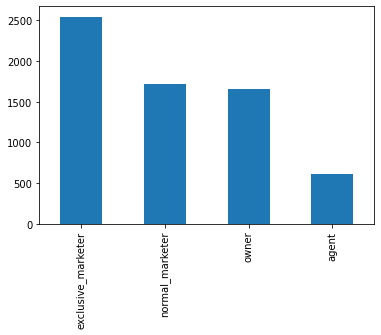

In [559]:
df['advertiser_type'].value_counts().plot(kind = 'bar')

In [560]:
df['iam_verified'].value_counts().sum()

6616

In [561]:
df['iam_verified'].sum()

6604

In [562]:
df['iam_verified'].value_counts()[1] / df['iam_verified'].value_counts().sum()

0.998186215235792

In [563]:
a = list(pd.DataFrame(df['district'].value_counts().head(10).reset_index(name='count'  ))['index'])

In [564]:
newdf = df.loc[df['district'].isin(a)]


In [565]:
# df.drop(['user_id', 'id', 'title', 'content', 'imgs', 'refresh', 'user' , 'path' , 'location' , 'last_update' ,'rega_id' ],axis=1,inplace=True)

# sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
# fig=plt.gcf()
# fig.set_size_inches(18,15)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()

In [566]:
# fig, ax = plt.subplots()
# ax.hist(x, n_bins, density=False, histtype='bar', color=colors, label=colors)
# # ax.set_ylabel('Scores')
# # ax.set_title('Scores by group and gender')
# # ax.legend()

# plt.show()

<AxesSubplot:>

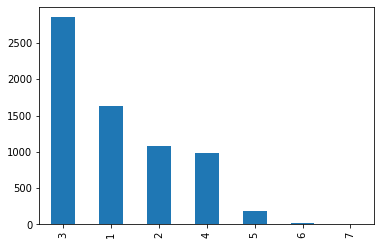

In [567]:
df['beds'].value_counts().plot(kind = 'bar')

In [568]:
len(df['create_time'])


6762

In [569]:
a = df['create_time'][2][2:12]
pd.to_datetime(a , format = '%Y-%m-%d')

Timestamp('2022-07-24 00:00:00')

In [570]:
copy = df

In [571]:
df['create_time'][1]

"['2022-08-06', '10:27:56']"

In [572]:
i=0 
while i < len(df['create_time']):
    a = df['create_time'][i][2:9]
    # a = pd.to_datetime(a , format = '%Y-%m-%d')
    copy['create_time'][i] = a
    i+=1

In [573]:
Copy = df.groupby('DayOfRent').size().reset_index(name = 'total')
Copy

,DayOfRent,total
0,0,4434
1,1,282
2,2,394
3,3,184
4,4,350
5,5,261
6,6,117
7,7,115
8,8,245
9,9,168


In [574]:
# df['DayOfRent']

In [575]:
Copy = Copy[Copy['DayOfRent'] != 0 ]

In [576]:
Copy = Copy[Copy['total'] >1]

we can see that until the begining of 2022 the curve is the consistent but after that we see increse of number of post 
the curve might not change 
bc : this not offMarket 

In [577]:
df['wc'].value_counts()

2    2591
1    2116
3    1627
4     348
5      80
Name: wc, dtype: int64

<AxesSubplot:>

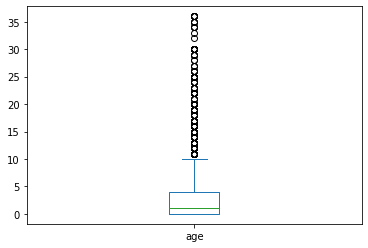

In [578]:
df['age'].plot(kind='box')

In [579]:
df['isOffMarket'] = True

In [580]:
df['isOffMarket'].value_counts()

True    6762
Name: isOffMarket, dtype: int64

In [581]:
sns.violinplot(data=df, x="beds", y="age", hue="isOffMarket",
               split=True, inner="quart", linewidth=1
            #    palette={"Yes": "b", "No": ".85"}
            )
sns.despine(left=True)

ValueError: There must be exactly two hue levels to use `split`.'

In [ ]:
df['']

(array([6.732e+03, 2.300e+01, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  119.9,  239.8,  359.7,  479.6,  599.5,  719.4,  839.3,
         959.2, 1079.1, 1199. ]),
 <BarContainer object of 10 artists>)

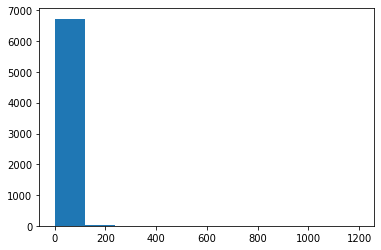

In [ ]:
# plt.hist(data= df , x= 'DayOfRent' ,)

In [ ]:
df['age'].min()

0.0

In [ ]:
cp = df

In [ ]:
cp['isOffMarket'].value_counts()

False    4434
True     2328
Name: isOffMarket, dtype: int64

In [ ]:
cp["district"][0] == 'حي النظيم'

True

In [ ]:
if cp['district'][0] =='حي النظيم':
            for index, row in cp.iterrows():
    
                    cp['district'][index] = modify_arabic_display(cp['district'][index])
        
                    

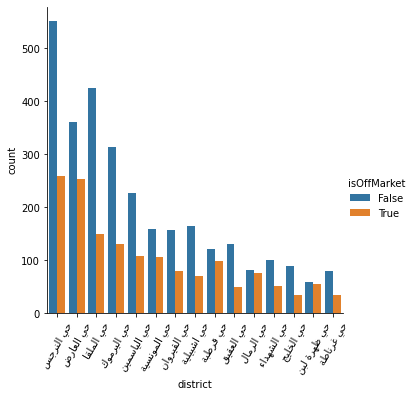

In [ ]:
ax = sns.catplot(x="district", hue="isOffMarket", kind="count", data=cp ,  order=df.district.value_counts().iloc[:15].index)
ax.set_xticklabels(rotation = 60)

In [ ]:
a = df.groupby('district').size()

In [ ]:
b= offMarket.groupby('district').size()

In [ ]:
b

district
حي أحد                        1
حي اشبيلية                   70
حي الازدهار                  14
حي الاندلس                   12
حي البديعة                    1
                             ..
حي قرطبة                     98
حي لبن                        5
حي مطار الملك خالد الدولي     3
حي منفوحة                     3
حي نمار                       1
Length: 101, dtype: int64

In [ ]:
totalDIST = pd.concat([a,b], axis=1).rename(columns={0 : 'total'  , 1 : "offMarket"} ).reset_index()

In [ ]:
totalDIST['percnt'] = 0

In [ ]:
for index , row  in totalDIST.iterrows() :
    totalDIST['percnt'][index] = row['offMarket'] /  row['total']

In [ ]:
totalDIST1 = totalDIST[(totalDIST['percnt'] > .50)  & (totalDIST['total'] > 2) ]

In [ ]:
# totalDIST = totalDIST[totalDIST['percnt'] > .50 ]

In [ ]:
totalDIST1.iloc[0][0]

'حي العزيزية'

In [ ]:
totalDIST1.iloc[0][0] == 'حي العزيزية'

True

In [ ]:
df['district'][0]

'حي النظيم'

In [ ]:
if totalDIST1.iloc[0][0] == 'حي العزيزية':
            for index, row in totalDIST1.iterrows():
    
                    totalDIST1['district'][index] = modify_arabic_display(totalDIST1['district'][index])

In [ ]:
totalDIST1 = totalDIST1.sort_values('percnt' , ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ﺔﻳﺰﻳﺰﻌﻟﺍ ﻲﺣ'),
  Text(1, 0, 'ﺔﻳﺪﻤﺤﻤﻟﺍ ﻲﺣ'),
  Text(2, 0, 'ﺔﻴﺳﺩﺎﻘﻟﺍ ﻲﺣ'),
  Text(3, 0, 'ﺪﺋﺍﺮﻟﺍ ﻲﺣ'),
  Text(4, 0, 'ﻰﻣﺍﺰﺨﻟﺍ ﻲﺣ'),
  Text(5, 0, 'ﺓﻮﺑﺮﻟﺍ ﻲﺣ'),
  Text(6, 0, 'ﺓﺮﻳﺰﺠﻟﺍ ﻲﺣ'),
  Text(7, 0, 'ﺔﺣﻮﻔﻨﻣ ﻲﺣ'),
  Text(8, 0, 'ﺀﺍﺮﻤﺤﻟﺍ ﻲﺣ'),
  Text(9, 0, 'ﺔﻌﻳﺪﺒﻟﺍ ﺓﺮﻬﻇ ﻲﺣ'),
  Text(10, 0, 'ﻲﺑﺍﻭﺮﻟﺍ ﻲﺣ'),
  Text(11, 0, 'ﻦﺒﻟ ﻲﺣ'),
  Text(12, 0, 'ﻖﻳﻮﻃ ﻲﺣ'),
  Text(13, 0, 'ﻲﻗﺮﺸﻟﺍ ﻢﻴﺴﻨﻟﺍ ﻲﺣ'),
  Text(14, 0, 'ﻡﺰﺤﻟﺍ ﻲﺣ'),
  Text(15, 0, 'ﻅﺎﻜﻋ ﻲﺣ')])

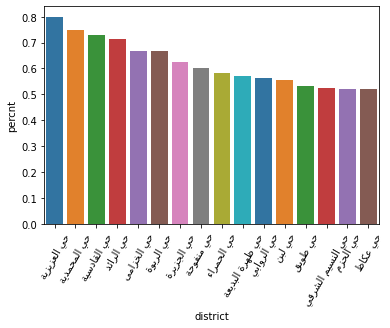

In [ ]:
ax = sns.barplot(data= totalDIST1 ,x='district' , y='percnt'  , palette='tab10')
plt.xticks(rotation=60)


In [ ]:
totalDIST['percnt'].sort_values()

27     0.066667
0      0.125000
70     0.125000
78     0.125000
4      0.166667
         ...   
111         NaN
113         NaN
114         NaN
115         NaN
123         NaN
Name: percnt, Length: 131, dtype: float64

In [ ]:
totalDIST2 = totalDIST[ (totalDIST['total'] > 50) ]

In [ ]:
totalDIST2.iloc[0][0] == 'حي طويق'

True

In [ ]:
if totalDIST2.iloc[0][0] == 'حي طويق':
            for index, row in totalDIST1.iterrows():
    
                    totalDIST2['district'][index] = modify_arabic_display(totalDIST2['district'][index])

In [ ]:
totalDIST2

,district,total,offMarket,percnt
116,ﻖﻳﻮﻃ ﻲﺣ,90,48.0,0.533333
118,ﻦﺒﻟ ﺓﺮﻬﻇ ﻲﺣ,115,54.0,0.469565
126,ﺔﺒﻃﺮﻗ ﻲﺣ,219,98.0,0.447489
24,ﻝﺎﻣﺮﻟﺍ ﻲﺣ,158,64.0,0.405063
44,ﺽﺭﺎﻌﻟﺍ ﻲﺣ,614,246.0,0.400651
80,ﺔﻴﺴﻧﻮﻤﻟﺍ ﻲﺣ,267,105.0,0.393258
92,ﻱﺩﺍﻮﻟﺍ ﻲﺣ,76,29.0,0.381579
79,ﺔﻳﺪﻬﻤﻟﺍ ﻲﺣ,88,32.0,0.363636
21,ﻊﻴﺑﺮﻟﺍ ﻲﺣ,108,39.0,0.361111
66,ﺝﻭﺮﻤﻟﺍ ﻲﺣ,81,29.0,0.358025


In [ ]:
totalDIST2 = totalDIST2.sort_values('percnt' , ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'ﻖﻳﻮﻃ ﻲﺣ'),
  Text(1, 0, 'ﻦﺒﻟ ﺓﺮﻬﻇ ﻲﺣ'),
  Text(2, 0, 'ﺔﺒﻃﺮﻗ ﻲﺣ'),
  Text(3, 0, 'ﻝﺎﻣﺮﻟﺍ ﻲﺣ'),
  Text(4, 0, 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ'),
  Text(5, 0, 'ﺔﻴﺴﻧﻮﻤﻟﺍ ﻲﺣ'),
  Text(6, 0, 'ﻱﺩﺍﻮﻟﺍ ﻲﺣ'),
  Text(7, 0, 'ﺔﻳﺪﻬﻤﻟﺍ ﻲﺣ'),
  Text(8, 0, 'ﻊﻴﺑﺮﻟﺍ ﻲﺣ'),
  Text(9, 0, 'ﺝﻭﺮﻤﻟﺍ ﻲﺣ'),
  Text(10, 0, 'ﻞﻔﻨﻟﺍ ﻲﺣ'),
  Text(11, 0, 'ﺀﺍﺪﻬﺸﻟﺍ ﻲﺣ'),
  Text(12, 0, 'ﻥﺍﻭﺮﻴﻘﻟﺍ ﻲﺣ'),
  Text(13, 0, 'ﺔﻓﺎﺤﺼﻟﺍ ﻲﺣ'),
  Text(14, 0, 'ﻦﻴﻤﺳﺎﻴﻟﺍ ﻲﺣ'),
  Text(15, 0, 'ﺲﺟﺮﻨﻟﺍ ﻲﺣ'),
  Text(16, 0, 'ﺔﻃﺎﻧﺮﻏ ﻲﺣ'),
  Text(17, 0, 'ﺔﻴﻠﻴﺒﺷﺍ ﻲﺣ'),
  Text(18, 0, 'ﻙﻮﻣﺮﻴﻟﺍ ﻲﺣ'),
  Text(19, 0, 'ﺔﻀﻬﻨﻟﺍ ﻲﺣ'),
  Text(20, 0, 'ﻖﻴﻘﻌﻟﺍ ﻲﺣ'),
  Text(21, 0, 'ﻦﻴﻄﺣ ﻲﺣ'),
  Text(22, 0, 'ﺎﻘﻠﻤﻟﺍ ﻲﺣ'),
  Text(23, 0, 'ﺞﻴﻠﺨﻟﺍ ﻲﺣ'),
  Text(24, 0, 'ﻯﺪﻨﻟﺍ ﻲﺣ'),
  Text(25, 0, 'ﺭﺎﻫﺩﺯﻻﺍ ﻲﺣ'),
  Text(26, 0, 'ﺔﻗﺮﻋ ﻲﺣ'),
  Text(27, 0, 'ﻞﺼﻴﻓ ﻚﻠﻤﻟﺍ ﻲﺣ')])

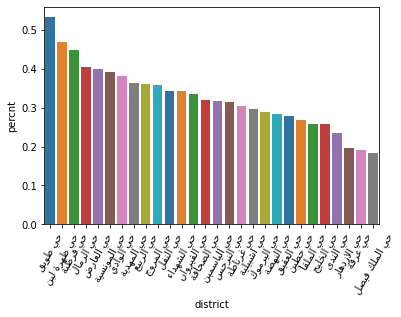

In [ ]:
ax = sns.barplot(data= totalDIST2 ,x='district' , y='percnt'  , palette='tab10')
plt.xticks(rotation=60)

In [590]:

fig = px.histogram(copy,'timeBeforeRent'  ,  )
fig.show()

TypeError: histogram() got an unexpected keyword argument 'yaxis'

In [595]:
df.iplot(kind='histogram', histnorm='probability', barmode='overlay',
     vline=[dict(x=df.timeBeforeRent.mean(),color='#5283AD'), dict(x=df.onMarket.mean(),color='#FDAB5A')])

AttributeError: 'DataFrame' object has no attribute 'iplot'